## Loading the Dataset

The dataset is loaded using pandas to perform Exploratory Data Analysis.

This project performs Exploratory Data Analysis (EDA) on the Best Selling Books 2023 dataset.  
The dataset contains information about book name, author, rating, reviews count, price, genre, and publishing details.  
The goal is to understand patterns, trends, and relationships in the dataset.

In [ ]:
import pandas as pd

df = pd.read_csv("best sellin books 2023.csv", encoding="latin-1")
df.head()

,id,Book name,Author,Rating,reviews count,form,price,Reading age,Print Length,Publishing date,Genre
0,#1,Atomic Habits: An Easy & Proven Way to Build G...,James Clear,4.8 out of 5 stars,145747,Hardcover,$18.88,NaN,320.0,16/10/2018,Self-Improvement
1,#2,"Iron Flame (Standard Edition) (The Empyrean, 2)",Rebecca Yarros,4.7 out of 5 stars,395512,Hardcover,$11.05,NaN,640.0,07/11/2023,Fiction & Action & Adventure
2,#3,Spare,Prince Harry The Duke of Sussex,4.5 out of 5 stars,116101,Hardcover,$11.99,NaN,416.0,"January 10, 2023",Biographies & Memoirs
3,#4,Fourth Wing,Rebecca Yarros,4.8 out of 5 stars,472618,Paperback,$13.62,NaN,544.0,17/09/2024,Fiction & Action & Adventure
4,#5,The Woman in Me,Britney Spears,4.4 out of 5 stars,51520,Hardcover,$11.37,NaN,288.0,"October 24, 2023",Biographies & Memoirs


## Research Questions

1. Which authors have the most best-selling books?
2. What is the distribution of book ratings?
3. How are book prices distributed?
4. Which genres are most popular?
5. Is there any relationship between price and rating?

In [ ]:
df.columns

Index(['id', 'Book name', 'Author', 'Rating', 'reviews count', 'form', 'price',
       'Reading age', 'Print Length', 'Publishing date', 'Genre'],
      dtype='object')

In [ ]:
df.shape

(100, 11)

The dataset contains 100 rows and 11 columns.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               100 non-null    object 
 1   Book name        100 non-null    object 
 2   Author           100 non-null    object 
 3   Rating           100 non-null    object 
 4   reviews count    100 non-null    int64  
 5   form             100 non-null    object 
 6   price            100 non-null    object 
 7   Reading age      30 non-null     object 
 8   Print Length     98 non-null     float64
 9   Publishing date  100 non-null    object 
 10  Genre            100 non-null    object 
dtypes: float64(1), int64(1), object(9)
memory usage: 8.7+ KB


## Dataset Information

The columns include book name, author, rating, reviews count, book format, price, reading age, print length, publishing date, and genre.  

Most of the columns are categorical (object type), while reviews count is an integer and print length is a numeric column.  
Some missing values are present in the "Reading age" and "Print Length" columns, which may require data cleaning before further analysis.

In [ ]:
df.describe()

,reviews count,Print Length
count,100.000000,98.000000
mean,111732.840000,361.224490
std,123318.545255,330.746688
min,3296.000000,24.000000
25%,26167.750000,208.000000
50%,77085.000000,344.000000
75%,129235.750000,448.000000
max,653111.000000,2896.000000


## Descriptive Statistics

The descriptive statistics show summary information for numerical columns in the dataset.  
The average number of reviews for books is approximately 111,733, with a maximum of 653,111 reviews.  
The average print length of books is around 361 pages, with the shortest book having 24 pages and the longest book having 2,896 pages.  

The distribution of reviews and print length shows variability, indicating that some books are extremely popular and some books are much longer than others.

In [ ]:
df.isnull().sum()

,0
id,0
Book name,0
Author,0
Rating,0
reviews count,0
form,0
price,0
Reading age,70
Print Length,2
Publishing date,0


**Missing Value Info**

The Reading age and the print length column has missing values as 70 and 2 respectively.

**Rating Distribution Graph(Histogram)**

In [ ]:
df["Rating"] = df["Rating"].str.extract(r'(\d\.\d)').astype(float)

<Axes: title={'center': 'Distribution of Book Ratings'}, ylabel='Frequency'>

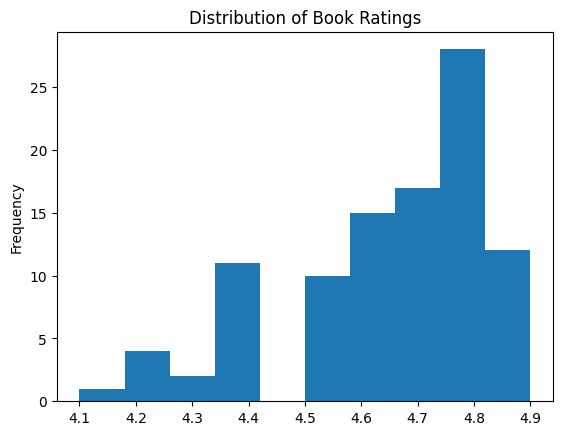

In [ ]:
df["Rating"].plot(kind="hist", title="Distribution of Book Ratings")


## Rating Distribution Analysis

The histogram shows that the ratings of best-selling books range from approximately 4.1 to 4.9.  
Most books have ratings between 4.6 and 4.8, indicating that highly rated books are more likely to become best sellers.  
Very few books have ratings below 4.3, suggesting that poorly rated books rarely achieve best-selling status.

**Top 10 Authors with Most Books**

<Axes: xlabel='Author'>

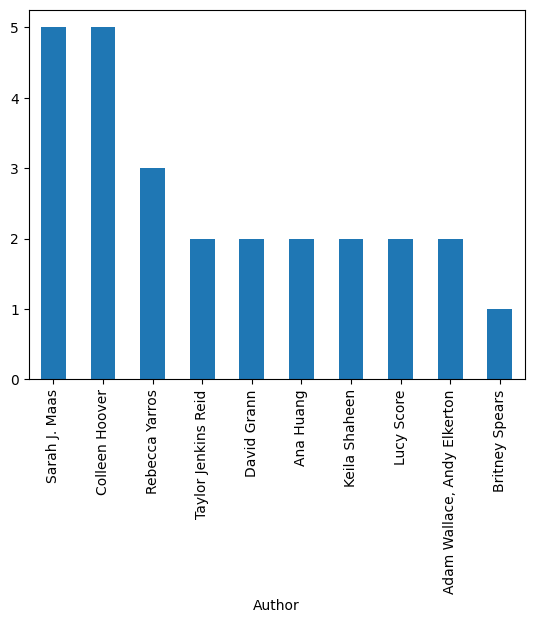

In [ ]:
df["Author"].value_counts().head(10).plot(kind="bar")

**Popular Authors**

From the above graph we observe that most famous auther are Sarah .J. Maas and Colleen Hoover

**Price Distribution**

In [ ]:
# Remove currency symbols and convert to numeric
df["price"] = df["price"].str.replace("₹", "").str.replace("$", "").str.replace(",", "")
df["price"] = pd.to_numeric(df["price"], errors="coerce")

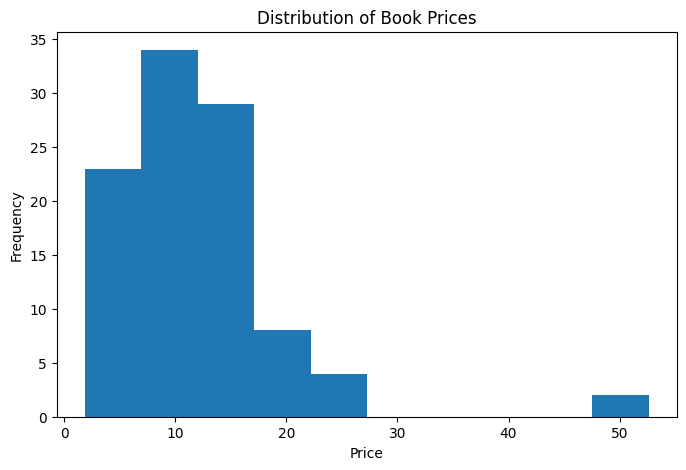

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(df["price"].dropna(), bins=10)
plt.title("Distribution of Book Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

## Price Distribution Analysis

The histogram shows the distribution of book prices.  
Most best-selling books are priced in the mid-range, while very few books are extremely cheap or very expensive.  
This suggests that moderately priced books tend to be more popular among readers.

**Genre Count**

<Axes: xlabel='Genre'>

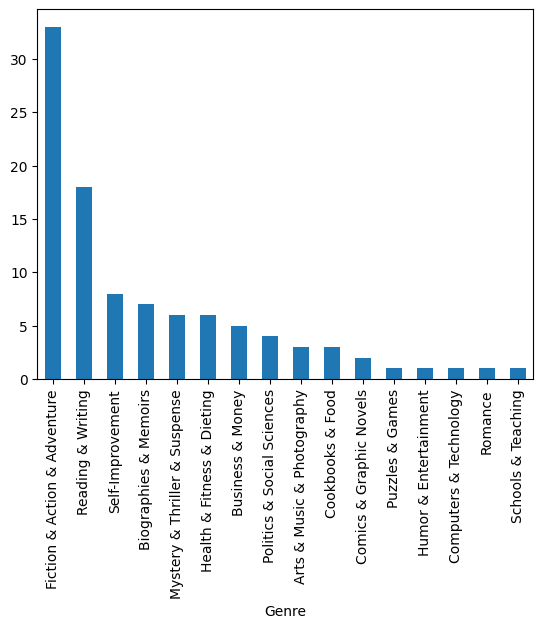

In [ ]:
df["Genre"].value_counts().plot(kind="bar")

## Genre Distribution Analysis

The bar chart shows the number of best-selling books in each genre.  
The most popular genre is
 *Fiction,Action & Adventure*, followed by *Reading & Writing* and *Self-Improvement*.  
Other genres like Biographies, Thriller, Business, and Social Sciences have moderate representation.  
Genres such as Romance, Technology, and Schools & Teaching have very few books in the dataset.  

This indicates that Action & Adventure and Self-Improvement genres are more popular among best-selling books in 2023.

**Correlation Heatmap Graph**

In [ ]:
df.dtypes

,0
id,object
Book name,object
Author,object
Rating,float64
reviews count,int64
form,object
price,float64
Reading age,object
Print Length,float64
Publishing date,object


In [ ]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
numeric_df

,Rating,reviews count,price,Print Length
0,4.8,145747,18.88,320.0
1,4.7,395512,11.05,640.0
2,4.5,116101,11.99,416.0
3,4.8,472618,13.62,544.0
4,4.4,51520,11.37,288.0
...,...,...,...,...
95,4.8,40073,12.00,192.0
96,4.8,91554,1.89,224.0
97,4.8,89173,5.26,84.0
98,4.8,34994,5.71,40.0


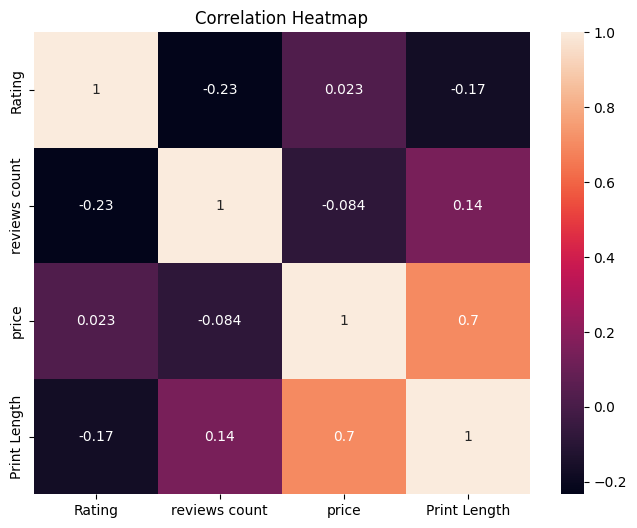

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()

**Correlation Heatmap Analysis**

The heatmap shows the relationship between numeric columns.  
Print length and price have a strong relationship, meaning bigger books cost more.  
Ratings do not depend on price or reviews.  
Most columns do not affect each other much.

## Conclusion

In this project, Exploratory Data Analysis was performed on the Best Selling Books 2023 dataset.  
The analysis showed that most best-selling books have high ratings between 4.3 and 4.8.  
Genres like Action, Self-Improvement, and Reading & Writing were the most popular.  
Book prices were mostly moderate, and longer books tended to be more expensive.  
The correlation analysis showed that price does not affect ratings, but print length has a strong relationship with price.  
Overall, the dataset provided useful insights into trends of best-selling books in 2023.